<a href="https://colab.research.google.com/github/raphaellins/ai-playground/blob/master/signal_classification_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow.keras import layers
import pickle
import zipfile

In [3]:
zip_object = zipfile.ZipFile(file="/content/drive/MyDrive/machine_learning_practice/traffic-signs-data.zip", mode="r")
zip_object.extractall('./')
zip_object.close()


In [ ]:
with open('/content/traffic-signs-data/train.p', mode="rb") as training_data:
  train = pickle.load(training_data)

with open('/content/traffic-signs-data/test.p', mode="rb") as testing_data:
  test = pickle.load(testing_data)

with open('/content/traffic-signs-data/valid.p', mode="rb") as validation_data:
  valid = pickle.load(validation_data)

In [9]:
X_train, y_train = train[ 'features'], train['labels']
X_test, y_test = test[ 'features'], test['labels']
X_validation, y_validation = valid[ 'features'], valid['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train  / 3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test  / 3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation  / 3, axis = 3, keepdims = True)

In [15]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

<Figure size 432x288 with 0 Axes>

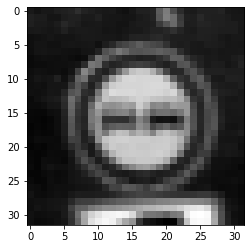

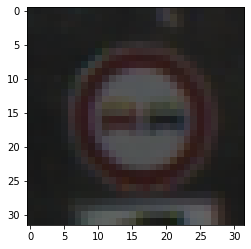

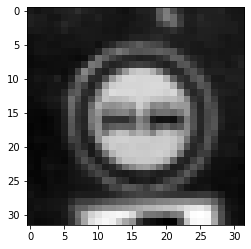

<Figure size 432x288 with 0 Axes>

In [18]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

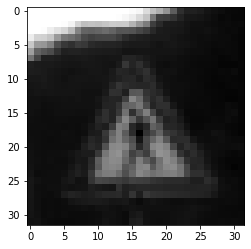

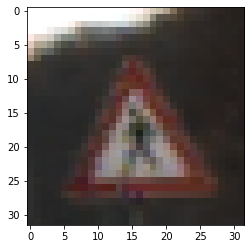

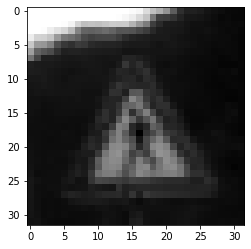

<Figure size 432x288 with 0 Axes>

In [19]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

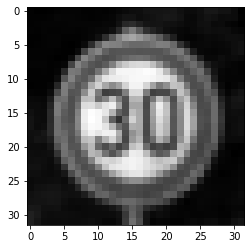

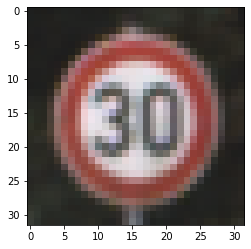

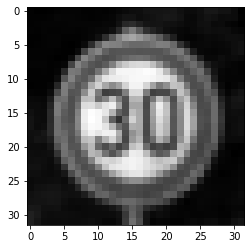

<Figure size 432x288 with 0 Axes>

In [20]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

In [21]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32, 32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5, 5), activation='relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation="relu"))

LeNet.add(layers.Dense(84, activation="relu"))

LeNet.add(layers.Dense(43, activation="softmax"))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [22]:
LeNet.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
history = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, validation_data=(X_validation_gray_norm, y_validation))

In [24]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

9/9 [==============================] - 1s 80ms/step - loss: 0.6971 - accuracy: 0.7961
Test Accuracy: 0.7961451411247253


In [ ]:
history.history.keys()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [ ]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    